<img src="/home/jagdish/pytn/7_projects/credit/1_resource/credit.png">

## Installation and setup

In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.4.1


In [6]:
#importing other libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#importing dataset
dataset_1 = pd.read_csv('/home/jagdish/pytn/7_projects/credit/3_dset/creditcard.csv')

In [8]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dataset_1.shape

(284807, 31)

In [10]:
#checking the null value
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
#observation in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# balance the dataset
fraud  = dataset_1[dataset_1["Class"]==1]
non_fraud = dataset_1[dataset_1["Class"]==0]

In [15]:
#checking shape of newly defined variable
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [16]:
#random selection of sample 
non_fraud_t = non_fraud.sample(n=492)

In [17]:
non_fraud_t.shape

(492, 31)

In [18]:
# merge the dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [19]:
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [20]:
#observation in dataset class
dataset["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [21]:
dataset.to_csv('/home/jagdish/pytn/7_projects/credit/3_dset/dataset.csv', index=False)

In [24]:
#matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [25]:
#dependent variable
y = dataset['Class']

In [26]:
x.shape, y.shape

((984, 30), (984,))

In [27]:
#spliting the data set in train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [30]:
x_train

array([[-0.57231383,  0.27320248, -0.19699279, ..., -0.08576703,
        -0.09162736, -0.37053101],
       [-0.82597298,  0.51387815, -0.10433962, ...,  0.45903421,
         0.60795033, -0.41204651],
       [-0.86280318,  0.19614169,  0.08789997, ...,  0.30472464,
         0.45545042, -0.41103599],
       ...,
       [-0.60958001,  0.67878269, -0.4897665 , ..., -0.20094879,
        -0.08365165, -0.3104051 ],
       [ 0.66120709, -0.06866658, -0.10640754, ..., -1.24231039,
         0.26328896, -0.38661511],
       [-0.29880706,  0.23037632, -0.55788231, ..., -0.23233163,
        -0.3387374 ,  0.16765479]])

In [31]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [32]:
y_test

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [28]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [33]:
#reshaping the dataset
x_train=x_train.reshape(787, 30, 1 )
x_test=x_test.reshape(197, 30, 1)

In [34]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

## Building the model


In [35]:
#define object
model = tf.keras.models.Sequential()

In [38]:
#first CNN layer
#activation functions bring non linearity to model 
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same',activation='relu',input_shape=(30,1)))

#batch normalization 
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
#pooling layer reduces the dimensionality of op
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#droupout layer
#regularization technique
#ignoring 20% neuron while training randomly
model.add(tf.keras.layers.Dropout(0.2))

In [37]:
# Second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same',activation='relu',input_shape=(30,1)))

#batch normalization 
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#droupout layer
model.add(tf.keras.layers.Dropout(0.3))

In [39]:
#flatten layer
#converts array to vector
model.add(tf.keras.layers.Flatten())

In [40]:
#first dense layer

model.add(tf.keras.layers.Dense(units=64, activation="relu"))
#droupout layer
model.add(tf.keras.layers.Dropout(0.3))

In [41]:
#outputlayer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [44]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [45]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

## Training the model


In [71]:
history=model.fit(x_train,y_train,epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
25/25 [==============================] - 5s 48ms/step - loss: 0.8887 - accuracy: 0.5164 - val_loss: 0.6625 - val_accuracy: 0.6701
Epoch 2/25
25/25 [==============================] - 0s 17ms/step - loss: 0.6847 - accuracy: 0.5902 - val_loss: 0.6452 - val_accuracy: 0.6244
Epoch 3/25
25/25 [==============================] - 0s 17ms/step - loss: 0.6801 - accuracy: 0.6625 - val_loss: 0.6416 - val_accuracy: 0.6041
Epoch 4/25
25/25 [==============================] - 0s 19ms/step - loss: 0.6201 - accuracy: 0.6888 - val_loss: 0.6385 - val_accuracy: 0.6041
Epoch 5/25
25/25 [==============================] - 0s 18ms/step - loss: 0.5486 - accuracy: 0.7336 - val_loss: 0.6296 - val_accuracy: 0.6041
Epoch 6/25
25/25 [==============================] - 0s 18ms/step - loss: 0.5078 - accuracy: 0.7689 - val_loss: 0.6122 - val_accuracy: 0.6244
Epoch 7/25
25/25 [==============================] - 0s 17ms/step - loss: 0.5032 - accuracy: 0.7732 - val_loss: 0.5891 - val_accuracy: 0.6599
Epoch 8/25
25

In [79]:
y_pred = model.predict_classes(x_test)


/home/jagdish/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [65]:
print(y_pred[50]),print(y_test[50])

[0]
0


(None, None)

In [59]:
#model prediction
row = [406,-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.016822468180826,0.416955705037907,0.126910559061474,0.517232370861764,-0.035049368605297,-0.465211076182388,0.320198198514526,0.044519167473172,0.177839798284401,0.261145002567677,-0.143275874698919,0
]
row=pd.Series(row)
# convert series object into array
arr = row.values

# reshaping series 
reshaped_arr = arr.reshape((1, 30,1))



y_pred = model.predict([reshaped_arr])

print('Predicted: %.3f' % y_pred)

Predicted: 0.880


In [60]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("/home/jagdish/pytn/7_projects/credit/2_code/creditmodel.h5")

In [66]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[34 72]
 [54 37]]


In [68]:
#accuracy score
from sklearn.metrics import accuracy_score
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)

0.3604060913705584


In [77]:
#learning curve
def learning_curve(history, epoch):

    #training vs valadiation accuracy
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend('Train', 'val',loc='upper left')
    plt.show()

#training vs valadiation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

<ipython-input-77-a878d63a479e>:11: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Train', 'val',loc='upper left')
<ipython-input-77-a878d63a479e>:11: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Train', 'val',loc='upper left')
<ipython-input-77-a878d63a479e>:11: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Train', 'val',loc='upper left')


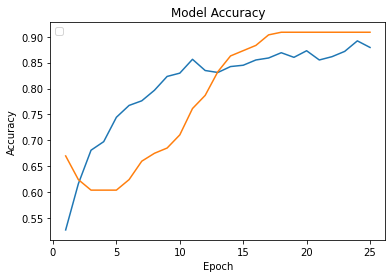

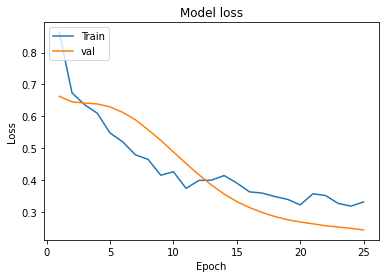

In [78]:
learning_curve(history, 25)

In [ ]:
#model is nither over fitted or under fitted 